# Join models to Observatiosn
* Join SURFEX to Observations

In [1]:
version = '7'

In [2]:
# Load auxiliar functions and configurations
filename = 'utils_v{}.ipynb'.format(version)
%run $filename

In [3]:
# Configurations
print('surfex_output_path', surfex_output_path)
print('temp_output_path', temp_output_path)

surfex_output_path ..\data\surfex\output
temp_output_path ..\data\observations\temp\output


#### Load observations

In [4]:
df_obs_3_jja = load_csv2df('temp_obs_3_jja.csv', temp_output_path, freq_index='3H')

# the observations time series is named 17
df_obs_3_jja = df_obs_3_jja.rename({'temp':17}, axis=1)
df_obs_3_jja.head()

,17
date,
1979-06-01 00:00:00,12.933333
1979-06-01 03:00:00,12.233333
1979-06-01 06:00:00,11.933333
1979-06-01 09:00:00,15.533333
1979-06-01 12:00:00,18.900000


#### Load SURFEX Models

In [5]:
all_models_jja = load_csv2df('temp_SURFEX_1979_2005_jja.csv', surfex_output_path, freq_index='3H')
all_models_jja.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
date,,,,,,,,,,,,,,,,,
1979-06-01 00:00:00,15.175944,16.408971,16.866713,15.531927,15.734511,12.655543,14.387332,13.355735,18.006408,20.958358,16.627010,18.272816,13.929665,16.386445,16.914535,16.805487,13.160482
1979-06-01 03:00:00,14.294798,15.953402,14.687100,15.575995,14.792961,11.754997,13.623897,12.511571,17.636460,19.883455,16.634043,18.086907,13.315412,16.360259,16.423232,16.618308,13.150757
1979-06-01 06:00:00,13.266676,15.269643,13.399966,15.176057,13.846416,10.958006,13.266368,11.816425,17.347856,19.022454,15.514045,17.738151,12.737732,16.297265,15.719568,16.330353,14.002542
1979-06-01 09:00:00,14.790693,16.824352,16.828873,15.340935,15.693357,12.071185,14.385000,14.182363,20.537705,20.569344,15.856026,18.181752,14.812698,17.389677,15.782042,15.614238,15.978520
1979-06-01 12:00:00,17.810620,19.931702,22.308535,16.713857,20.424870,13.967342,17.898582,18.304743,26.120780,24.715534,17.958413,20.074247,18.074111,20.543448,19.492173,16.292591,19.330162


### Joining the models data and observations

In [6]:
df_all_jja = all_models_jja.join(df_obs_3_jja, on='date', how='inner')
df_all_jja.dropna(subset=[17], axis=0, inplace=True)
df_all_jja = df_all_jja.asfreq('3H')
df_all_jja.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
date,,,,,,,,,,,,,,,,,,
1979-06-01 00:00:00,15.175944,16.408971,16.866713,15.531927,15.734511,12.655543,14.387332,13.355735,18.006408,20.958358,16.627010,18.272816,13.929665,16.386445,16.914535,16.805487,13.160482,12.933333
1979-06-01 03:00:00,14.294798,15.953402,14.687100,15.575995,14.792961,11.754997,13.623897,12.511571,17.636460,19.883455,16.634043,18.086907,13.315412,16.360259,16.423232,16.618308,13.150757,12.233333
1979-06-01 06:00:00,13.266676,15.269643,13.399966,15.176057,13.846416,10.958006,13.266368,11.816425,17.347856,19.022454,15.514045,17.738151,12.737732,16.297265,15.719568,16.330353,14.002542,11.933333
1979-06-01 09:00:00,14.790693,16.824352,16.828873,15.340935,15.693357,12.071185,14.385000,14.182363,20.537705,20.569344,15.856026,18.181752,14.812698,17.389677,15.782042,15.614238,15.978520,15.533333
1979-06-01 12:00:00,17.810620,19.931702,22.308535,16.713857,20.424870,13.967342,17.898582,18.304743,26.120780,24.715534,17.958413,20.074247,18.074111,20.543448,19.492173,16.292591,19.330162,18.900000


#### Save and load

In [7]:
save_df2csv(df_all_jja, 'surfex_join_obs_jja.csv', surfex_output_path, index=True)

In [8]:
df_all_jja_ = load_csv2df('surfex_join_obs_jja.csv', surfex_output_path, freq_index='3H')
assert compare_saved_loaded_df(df_all_jja_, df_all_jja)

In [9]:
mean_hourly = df_all_jja.groupby(df_all_jja.index.time).mean()
mean_hourly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
00:00:00,18.562612,18.768965,17.880433,17.918464,19.654939,17.787281,18.464623,17.182039,18.739371,20.447057,20.074673,19.445604,19.908002,18.830560,19.895508,20.304726,19.313121,19.753331
03:00:00,17.488658,17.939277,16.912771,16.873627,18.717159,16.788582,17.753530,16.130427,18.178502,19.550173,19.287271,18.410238,18.929190,18.162604,19.012333,19.296278,18.349746,18.895598
06:00:00,16.716959,17.187947,16.193547,16.066930,17.877956,16.082589,17.030963,15.402580,17.630885,18.741871,18.502894,17.626675,18.126057,17.586451,18.238446,18.489516,17.679520,18.356371
09:00:00,19.172754,18.384172,18.348396,18.509176,19.191364,18.597966,18.289216,17.595597,20.297205,19.943861,19.848229,19.993321,19.900344,20.589350,19.603645,20.642420,20.160075,20.518839
12:00:00,23.803261,22.285033,22.677987,23.422954,23.545088,23.658938,21.660458,21.666522,25.088772,23.941077,23.570417,24.847085,24.969755,25.506807,23.878777,26.211368,24.806264,24.184023
15:00:00,26.741255,25.183387,25.656805,26.701778,26.718850,26.995307,23.998822,24.403178,27.486403,26.905818,26.208027,28.123604,28.712293,27.541509,26.874767,30.039132,27.734447,25.913117
18:00:00,25.083813,24.130523,24.204209,24.969075,25.545210,25.116234,23.168640,23.243681,25.057364,25.911907,25.209933,26.424919,27.264590,25.212465,25.619099,28.217759,25.934979,24.674856
21:00:00,21.058368,20.878387,20.282998,20.558076,21.983523,20.527397,20.272060,19.636784,20.770810,22.615099,21.998616,22.072983,22.718255,21.007417,22.129022,23.269024,21.770930,21.470768


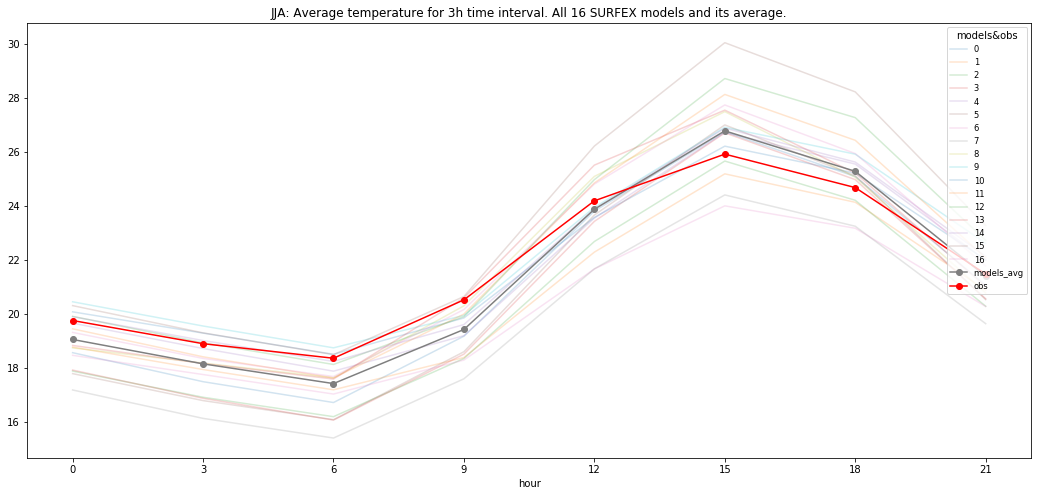

In [10]:
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'

_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("JJA: Average temperature for 3h time interval. All 16 SURFEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_jja', output_dir = plots_output_path)

* It seems that the models have a hard time to simulate the temperature during the periods without the sun (<6h - >18h).
* In that period the system's inertia is badly simulated.
* When there is sun (>6h - <18h) this active source of heat seems to dominate the physical process and is better considered in the model.
* Is this visible for the corresponding periods for the other seasons? In the winter this should happen for a shorter period. 

### Join all seasons

### 'DJF' 

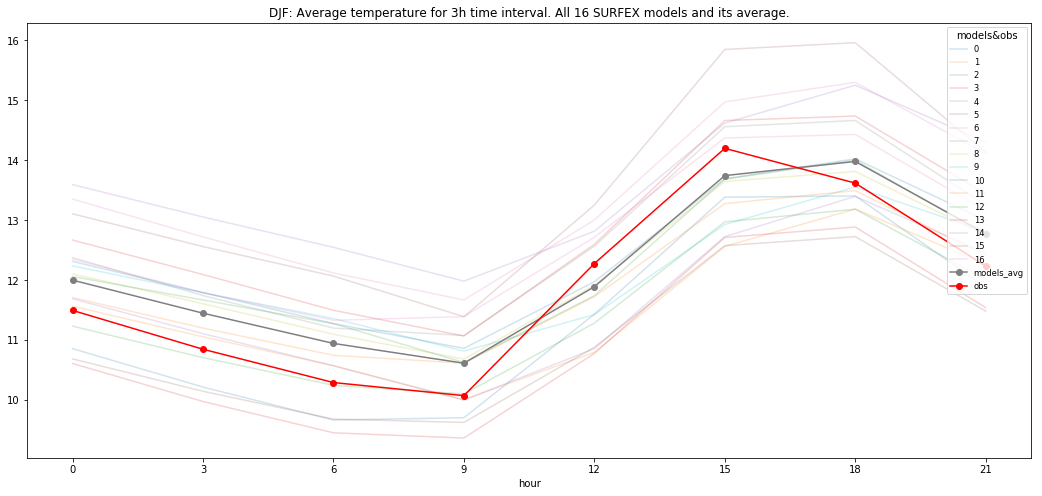

In [11]:
# load observations
df_obs_3_djf = load_csv2df('temp_obs_3_djf.csv', temp_output_path, freq_index='3H')
df_obs_3_djf = df_obs_3_djf.rename({'temp':17}, axis=1)
#load models
all_models_djf = load_csv2df('temp_SURFEX_1979_2005_djf.csv', surfex_output_path, freq_index='3H')
# join
df_all_djf = all_models_djf.join(df_obs_3_djf, on='date', how='inner')
df_all_djf.dropna(subset=[17], axis=0, inplace=True)
df_all_djf = df_all_djf.asfreq('3H')
# save joined
save_df2csv(df_all_djf, 'surfex_join_obs_djf.csv', surfex_output_path, index=True)
# re-load
df_all_djf_ = load_csv2df('surfex_join_obs_djf.csv', surfex_output_path, freq_index='3H')
# hourly mean
mean_hourly = df_all_djf.groupby(df_all_djf.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'
#plot
_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("DJF: Average temperature for 3h time interval. All 16 SURFEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_djf', output_dir = plots_output_path)

### 'MAM'

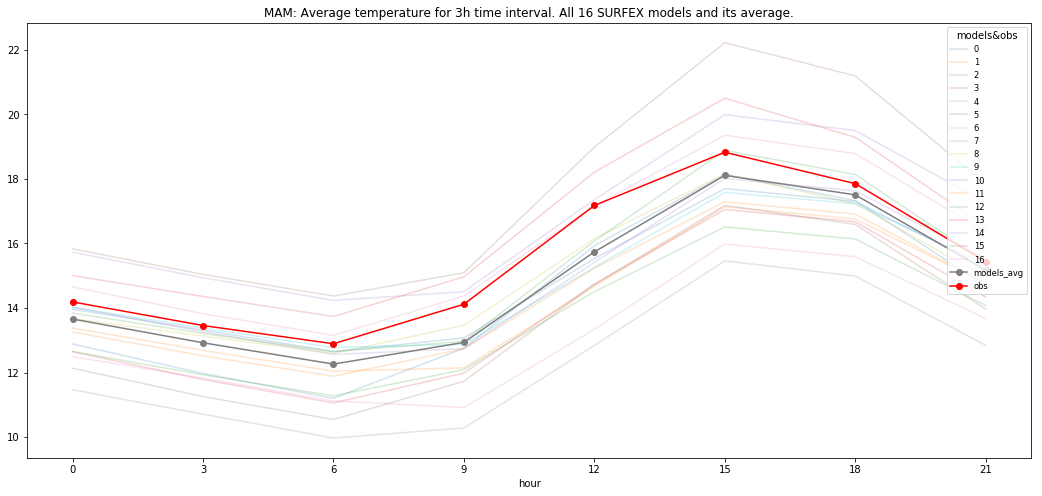

In [12]:
# load observations
df_obs_3_mam = load_csv2df('temp_obs_3_mam.csv', temp_output_path, freq_index='3H')
df_obs_3_mam = df_obs_3_mam.rename({'temp':17}, axis=1)
#load models
all_models_mam = load_csv2df('temp_SURFEX_1979_2005_mam.csv', surfex_output_path, freq_index='3H')
# join
df_all_mam = all_models_mam.join(df_obs_3_mam, on='date', how='inner')
df_all_mam.dropna(subset=[17], axis=0, inplace=True)
df_all_mam = df_all_mam.asfreq('3H')
# save joined
save_df2csv(df_all_mam, 'surfex_join_obs_mam.csv', surfex_output_path, index=True)
# re-load
df_all_mam_ = load_csv2df('surfex_join_obs_mam.csv', surfex_output_path, freq_index='3H')
# hourly mean
mean_hourly = df_all_mam.groupby(df_all_mam.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'
#plot
_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("MAM: Average temperature for 3h time interval. All 16 SURFEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_mam', output_dir = plots_output_path)

### 'SON' 

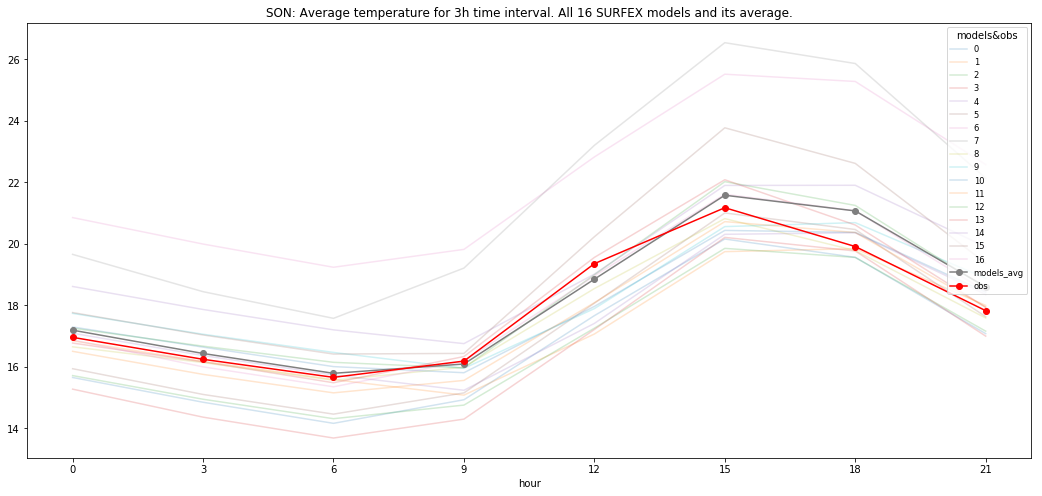

In [13]:
# load observations
df_obs_3_son = load_csv2df('temp_obs_3_son.csv', temp_output_path, freq_index='3H')
df_obs_3_son = df_obs_3_son.rename({'temp':17}, axis=1)
#load models
all_models_son = load_csv2df('temp_SURFEX_1979_2005_son.csv', surfex_output_path, freq_index='3H')
# join
df_all_son = all_models_son.join(df_obs_3_son, on='date', how='inner')
df_all_son.dropna(subset=[17], axis=0, inplace=True)
df_all_son = df_all_son.asfreq('3H')
# save joined
save_df2csv(df_all_son, 'surfex_join_obs_son.csv', surfex_output_path, index=True)
# re-load
df_all_son_ = load_csv2df('surfex_join_obs_son.csv', surfex_output_path, freq_index='3H')
# hourly mean
mean_hourly = df_all_son.groupby(df_all_son.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'
#plot
_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("SON: Average temperature for 3h time interval. All 16 SURFEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_son', output_dir = plots_output_path)